<h1 style="color:red;">Data Loading, Exploration and Preprocessing</h1>

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import optuna
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import joblib

In [118]:
df = pd.read_csv("synthetic_ticket_purchases.csv")

In [120]:
print(df.dtypes)
df.info()

user_id                      object
event_id                     object
tier_id                      object
purchase_timestamp           object
purchase_amount             float64
tickets_quantity              int64
payment_card_id              object
ip_address                   object
purchase_success               bool
location                     object
time_since_last_purchase    float64
failed_attempts_count         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   1000 non-null   object 
 1   event_id                  1000 non-null   object 
 2   tier_id                   1000 non-null   object 
 3   purchase_timestamp        1000 non-null   object 
 4   purchase_amount           1000 non-null   float64
 5   tickets_quantity          1000 non-null   int64  
 6   pay

In [122]:
df.columns

Index(['user_id', 'event_id', 'tier_id', 'purchase_timestamp',
       'purchase_amount', 'tickets_quantity', 'payment_card_id', 'ip_address',
       'purchase_success', 'location', 'time_since_last_purchase',
       'failed_attempts_count'],
      dtype='object')

In [124]:
df.head()

,user_id,event_id,tier_id,purchase_timestamp,purchase_amount,tickets_quantity,payment_card_id,ip_address,purchase_success,location,time_since_last_purchase,failed_attempts_count
0,user_1,event_20,tier_3,2025-06-24 03:53:37.616459,100.0,3,4cfbbf9dc6,192.168.253.58,False,Robbinsmouth,-12371.0,1
1,user_1,event_19,tier_2,2025-06-24 04:19:37.616459,75.0,2,9eb9b0203e,172.27.157.219,True,Port Patriciaside,NaN,0
2,user_1,event_10,tier_4,2025-06-24 07:01:37.616459,150.0,1,dda0c15e02,172.21.92.207,True,Jenniferfurt,-4960.0,2
3,user_1,event_3,tier_4,2025-06-27 17:41:37.616459,150.0,3,916f6b5154,192.168.1.100,False,Port Jade,-5442.0,2
4,user_1,event_11,tier_2,2025-06-29 11:54:37.616459,75.0,3,b5e600dcd8,172.23.169.21,True,East Charlesmouth,-12688.0,0


In [126]:
df.describe()

,purchase_amount,tickets_quantity,time_since_last_purchase,failed_attempts_count
count,1000.000000,1000.000000,950.000000,1000.000000
mean,114.525000,2.716000,125.760000,0.797000
std,53.032649,3.070957,18241.618502,0.841724
min,50.000000,1.000000,-40407.000000,0.000000
25%,75.000000,1.000000,-12682.000000,0.000000
50%,100.000000,2.000000,-132.000000,1.000000
75%,150.000000,3.000000,13651.500000,1.000000
max,200.000000,20.000000,41491.000000,4.000000


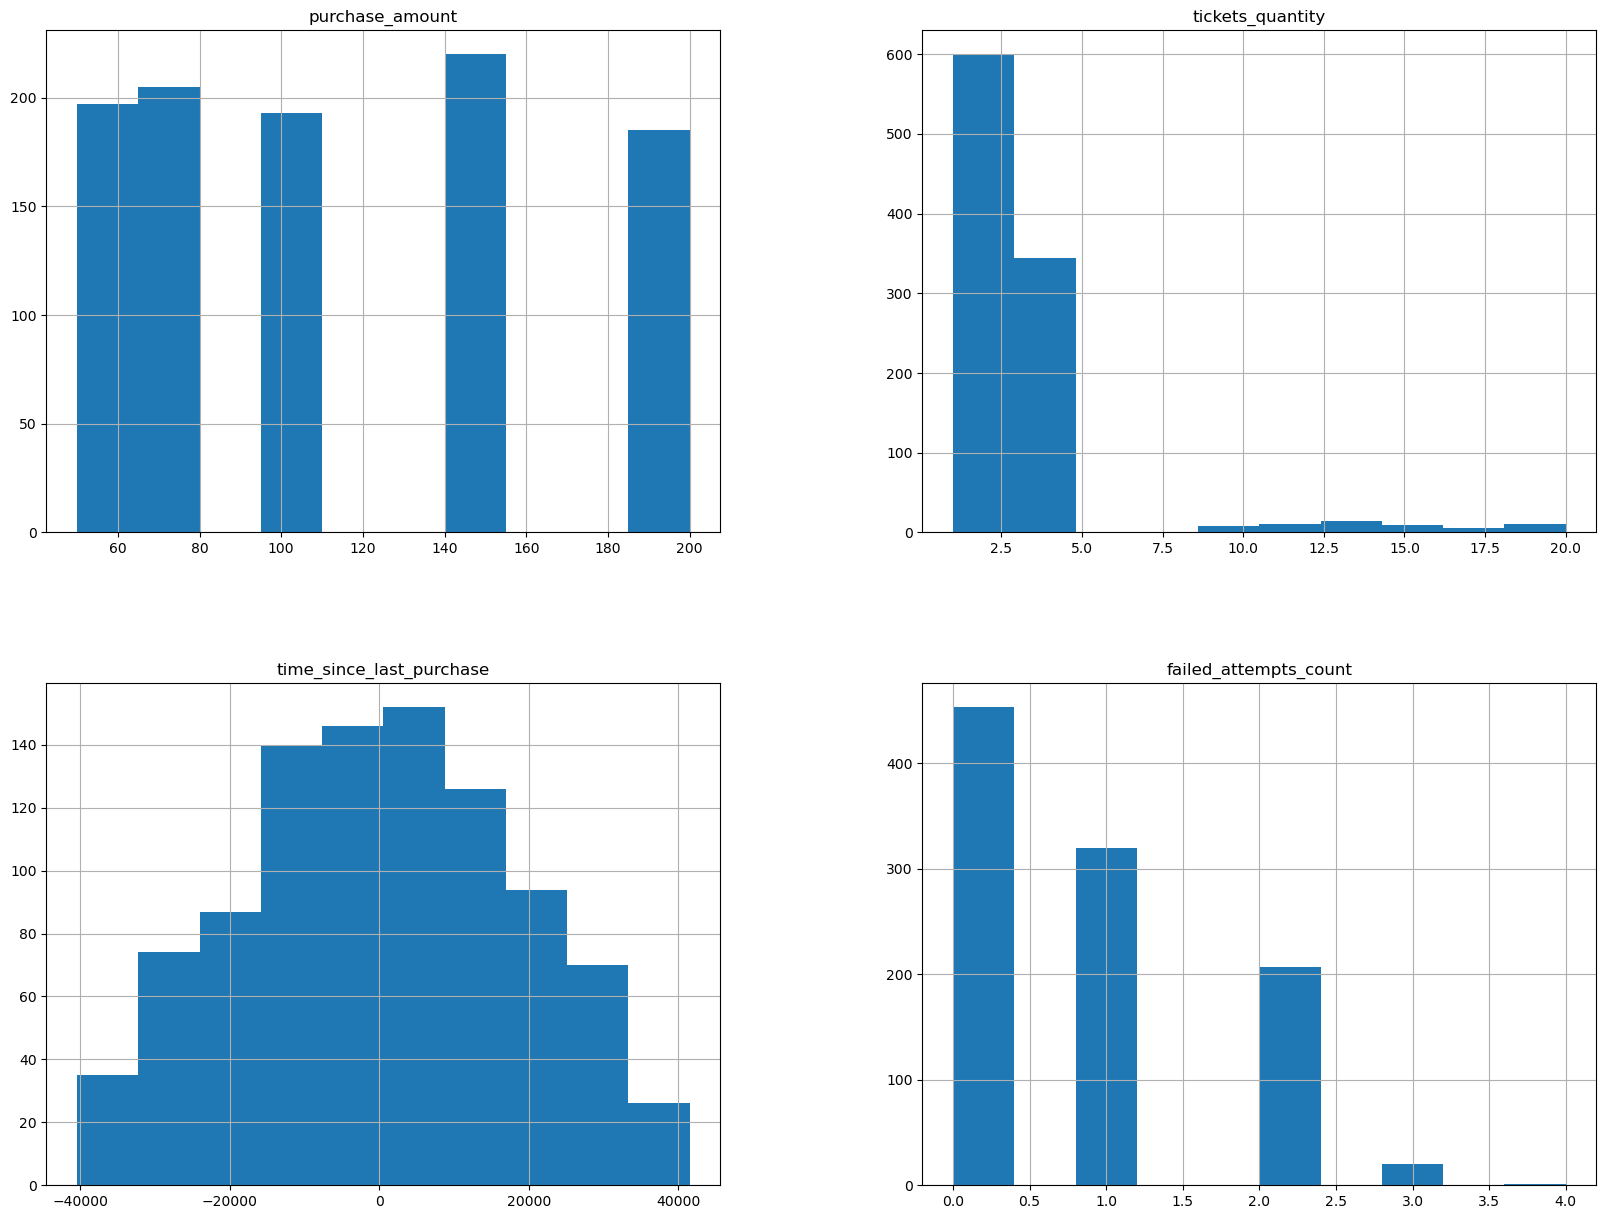

In [128]:
df.hist(figsize=(20,15))
plt.show()

In [130]:
print("Number of duplicates :", df.duplicated().sum())

Number of duplicates : 0


In [132]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

In [134]:
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary = missing_summary.sort_values(by='Missing Values', ascending=False)
print(missing_summary)

                          Missing Values  Percentage (%)
time_since_last_purchase              50             5.0


In [136]:
df['time_since_last_purchase'] = df['time_since_last_purchase'].fillna(1440)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   1000 non-null   object 
 1   event_id                  1000 non-null   object 
 2   tier_id                   1000 non-null   object 
 3   purchase_timestamp        1000 non-null   object 
 4   purchase_amount           1000 non-null   float64
 5   tickets_quantity          1000 non-null   int64  
 6   payment_card_id           1000 non-null   object 
 7   ip_address                1000 non-null   object 
 8   purchase_success          1000 non-null   bool   
 9   location                  1000 non-null   object 
 10  time_since_last_purchase  1000 non-null   float64
 11  failed_attempts_count     1000 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 87.0+ KB


<h2>Data Cleaning: Drop Unnecessary Columns</h2>

In [141]:
df = df.drop(columns=[
    'purchase_success',
    'user_id', 'event_id', 'tier_id',
    'payment_card_id', 'ip_address', 'location'
])

df = df.drop(columns=['purchase_timestamp'])

<h2>Feature Selection</h2>

In [144]:
feature_cols = [
    'purchase_amount',
    'tickets_quantity',
    'time_since_last_purchase',
    'failed_attempts_count'
]

X = df[feature_cols]

print(f"Cleaned feature matrix shape: {X.shape}")
print(X.head())


Cleaned feature matrix shape: (1000, 4)
   purchase_amount  tickets_quantity  time_since_last_purchase  \
0            100.0                 3                  -12371.0   
1             75.0                 2                    1440.0   
2            150.0                 1                   -4960.0   
3            150.0                 3                   -5442.0   
4             75.0                 3                  -12688.0   

   failed_attempts_count  
0                      1  
1                      0  
2                      2  
3                      2  
4                      0  


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   purchase_amount           1000 non-null   float64
 1   tickets_quantity          1000 non-null   int64  
 2   time_since_last_purchase  1000 non-null   float64
 3   failed_attempts_count     1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


<h2>Scaling</h2>

In [149]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1 style="color:red">Isolation Forest</h1>

<h2>Hyperparameter Tuning with Optuna: </h2><p>We use Optuna, a powerful hyperparameter optimization framework, to tune IsolationForest parameters for fraud detection. The goal is to maximize the range of anomaly scores, encouraging greater separation between normal and anomalous transactions.</p>

In [188]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    contamination = trial.suggest_float('contamination', 0.001, 0.5, log=True)

    model = IsolationForest(
        n_estimators=n_estimators, 
        contamination=contamination,
        random_state=42
    )
    model.fit(X_scaled)

    scores = model.decision_function(X_scaled)
    score_range = np.max(scores) - np.min(scores)

    return score_range

# Run the Optuna optimization
study_IsolationForest = optuna.create_study(direction='maximize')
study_IsolationForest.optimize(objective, n_trials=50)

# Output the best hyperparameters
best_params_isoforest = study_IsolationForest.best_params
print("Best hyperparameters:", best_params_isoforest)


[I 2025-07-29 03:43:52,021] A new study created in memory with name: no-name-5bea3bbc-1d7f-41ab-9e47-410081d5a712
[I 2025-07-29 03:43:52,352] Trial 0 finished with value: 0.3072092050351813 and parameters: {'n_estimators': 285, 'contamination': 0.014827302418546353}. Best is trial 0 with value: 0.3072092050351813.
[I 2025-07-29 03:43:52,779] Trial 1 finished with value: 0.3075653655176625 and parameters: {'n_estimators': 418, 'contamination': 0.36862663345489194}. Best is trial 1 with value: 0.3075653655176625.
[I 2025-07-29 03:43:52,998] Trial 2 finished with value: 0.30894366383947064 and parameters: {'n_estimators': 221, 'contamination': 0.004916505333720506}. Best is trial 2 with value: 0.30894366383947064.
[I 2025-07-29 03:43:53,389] Trial 3 finished with value: 0.3062488167712647 and parameters: {'n_estimators': 388, 'contamination': 0.04831425761680446}. Best is trial 2 with value: 0.30894366383947064.
[I 2025-07-29 03:43:53,838] Trial 4 finished with value: 0.3074197938657216 a

Best hyperparameters: {'n_estimators': 202, 'contamination': 0.03241393570188882}


<h2>Training Final Isolation Forest Model & Anomaly Prediction</h2><p>We use the best hyperparameters found via Optuna to retrain the final IsolationForest model on the entire dataset. We then compute anomaly scores and classify each instance as normal or anomaly</p>

In [197]:
best_params = study_IsolationForest.best_params

final_model = IsolationForest(**best_params, random_state=42)
final_model.fit(X_scaled)

y_scores = final_model.decision_function(X_scaled)

y_pred = final_model.predict(X_scaled)


results_df = pd.DataFrame({
    'anomaly_score': y_scores,
    'prediction': y_pred
})


results_df['label'] = results_df['prediction'].map({1: 'Normal', -1: 'Anomaly'})

label_counts = results_df['label'].value_counts()
print(label_counts)


label
Normal     967
Anomaly     33
Name: count, dtype: int64


<h2>visualize anomalies </h2>

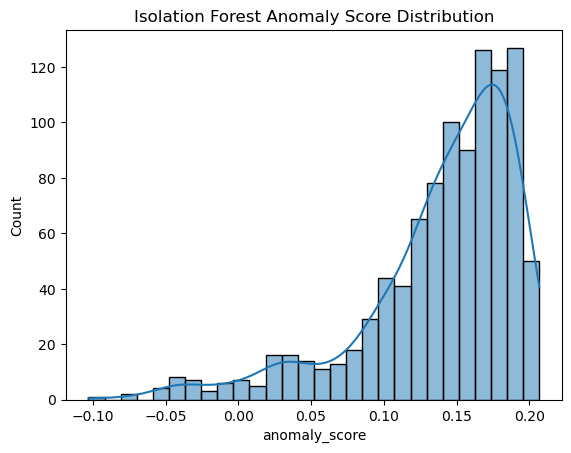

     anomaly_score  prediction    label
879      -0.103015          -1  Anomaly
238      -0.076543          -1  Anomaly
618      -0.076064          -1  Anomaly
201      -0.057595          -1  Anomaly
477      -0.056911          -1  Anomaly
652      -0.055980          -1  Anomaly
611      -0.051439          -1  Anomaly
731      -0.045792          -1  Anomaly
700      -0.045557          -1  Anomaly
656      -0.045066          -1  Anomaly


In [200]:
sns.histplot(results_df['anomaly_score'], kde=True)
plt.title("Isolation Forest Anomaly Score Distribution")
plt.show()

print(results_df.sort_values('anomaly_score').head(10))

<h1>Evaluating the isolation forest by injecting anomalies</h1>

In [203]:

X_synthetic = X_scaled.copy()

n_anomalies = 100
np.random.seed(42)
anomaly_indices = np.random.choice(len(X_synthetic), n_anomalies, replace=False)

X_synthetic[anomaly_indices] += np.random.normal(loc=15, scale=7, size=X_synthetic[anomaly_indices].shape)

y_pred_synthetic = final_model.predict(X_synthetic)

detected_anomalies = (y_pred_synthetic[anomaly_indices] == -1).sum()

print(f"Injected {n_anomalies} synthetic anomalies.")
print(f"Model detected {detected_anomalies} of them as anomalies.")
print(f"Detection rate: {detected_anomalies / n_anomalies:.2%}")


Injected 100 synthetic anomalies.
Model detected 100 of them as anomalies.
Detection rate: 100.00%


<h1 style="color:red">OneClassSVM</h1>


<h2>Hyperparameter Tuning with Optuna: </h2>

In [227]:
def objective(trial):
    nu = trial.suggest_float('nu', 0.01, 0.2)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = OneClassSVM(nu=nu, kernel='rbf', gamma=gamma)
    model.fit(X_scaled)

    scores = model.decision_function(X_scaled)
    score_range = np.max(scores) - np.min(scores)  # proxy for how well the model separates normal from anomalies

    return score_range


In [229]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
best_params_ocsvm = study.best_params


[I 2025-07-29 03:50:07,989] A new study created in memory with name: no-name-ff56b8ae-a4f2-471d-8910-db042e95c2f9
[I 2025-07-29 03:50:08,001] Trial 0 finished with value: 13.620342199255589 and parameters: {'nu': 0.1154229456081951, 'gamma': 'scale'}. Best is trial 0 with value: 13.620342199255589.
[I 2025-07-29 03:50:08,011] Trial 1 finished with value: 18.967508453022354 and parameters: {'nu': 0.1418980704759292, 'gamma': 'auto'}. Best is trial 1 with value: 18.967508453022354.
[I 2025-07-29 03:50:08,029] Trial 2 finished with value: 10.343263784827815 and parameters: {'nu': 0.09762695508108181, 'gamma': 'scale'}. Best is trial 1 with value: 18.967508453022354.
[I 2025-07-29 03:50:08,037] Trial 3 finished with value: 3.2087085826458415 and parameters: {'nu': 0.04383397658637933, 'gamma': 'auto'}. Best is trial 1 with value: 18.967508453022354.
[I 2025-07-29 03:50:08,043] Trial 4 finished with value: 2.5809070134478236 and parameters: {'nu': 0.0385620216100385, 'gamma': 'auto'}. Best 

Best parameters: {'nu': 0.19984209268885592, 'gamma': 'auto'}


In [231]:
ocsvm = OneClassSVM(**best_params_ocsvm)
ocsvm.fit(X_scaled)
y_pred_ocsvm = ocsvm.predict(X_scaled)
y_pred_ocsvm = np.where(y_pred_ocsvm == 1, 0, 1)

print(f"Detected anomalies: {np.sum(y_pred_ocsvm)} / {len(y_pred_ocsvm)}")

Detected anomalies: 200 / 1000


<h1 style="color:red">LocalOutlierFactor</h1>

In [234]:
def objective_lof(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 5, 50)
    contamination = trial.suggest_float('contamination', 0.01, 0.2)

    lof = LocalOutlierFactor(
        n_neighbors=n_neighbors,
        contamination=contamination,
        novelty=False 
    )

    y_pred = lof.fit_predict(X_scaled)
    y_pred = (y_pred == -1).astype(int)
    anomaly_ratio = y_pred.mean()
    return abs(anomaly_ratio - 0.05) 
study_lof = optuna.create_study(direction='minimize')
study_lof.optimize(objective_lof, n_trials=50)

best_params_lof = study_lof.best_params
print("🔧 Best LOF parameters:", best_params_lof)


[I 2025-07-29 03:50:17,603] A new study created in memory with name: no-name-c4932aec-dc9f-4370-8888-ed1074fbee6d
[I 2025-07-29 03:50:17,622] Trial 0 finished with value: 0.115 and parameters: {'n_neighbors': 28, 'contamination': 0.16430311550396187}. Best is trial 0 with value: 0.115.
[I 2025-07-29 03:50:17,631] Trial 1 finished with value: 0.05199999999999999 and parameters: {'n_neighbors': 28, 'contamination': 0.10153597652955448}. Best is trial 1 with value: 0.05199999999999999.
[I 2025-07-29 03:50:17,642] Trial 2 finished with value: 0.05299999999999999 and parameters: {'n_neighbors': 30, 'contamination': 0.10253130254545734}. Best is trial 1 with value: 0.05199999999999999.
[I 2025-07-29 03:50:17,656] Trial 3 finished with value: 0.006999999999999999 and parameters: {'n_neighbors': 50, 'contamination': 0.05677132976927575}. Best is trial 3 with value: 0.006999999999999999.
[I 2025-07-29 03:50:17,656] Trial 4 finished with value: 0.003999999999999997 and parameters: {'n_neighbors'

🔧 Best LOF parameters: {'n_neighbors': 33, 'contamination': 0.04976088172520919}


In [240]:
final_lof = LocalOutlierFactor(**best_params_lof)

y_pred_lof = final_lof.fit_predict(X_scaled)
y_pred_lof = (y_pred_lof == -1).astype(int)

print(f" Total anomalies detected: {np.sum(y_pred_lof)} / {len(y_pred_lof)}")

 Total anomalies detected: 50 / 1000


<h1 style="color:red" >Evaluation and models comparison </h1>

<p>This code snippet generates synthetic anomalies by injecting strong noise into a subset of your scaled data, then tests how well three different anomaly detection models identify these injected anomalies</p>

In [245]:
X_synthetic = X_scaled.copy()

n_anomalies = 100
np.random.seed(42)
anomaly_indices = np.random.choice(len(X_synthetic), n_anomalies, replace=False)
X_synthetic[anomaly_indices] += np.random.normal(loc=15, scale=7, size=X_synthetic[anomaly_indices].shape)

y_pred_isoforest = final_model.predict(X_synthetic)
detected_isoforest = (y_pred_isoforest[anomaly_indices] == -1).sum()

y_pred_ocsvm = ocsvm.predict(X_synthetic)
y_pred_ocsvm = np.where(y_pred_ocsvm == 1, 0, 1) 
detected_ocsvm = y_pred_ocsvm[anomaly_indices].sum()

lof_model = LocalOutlierFactor(**best_params_lof)
y_pred_lof = lof_model.fit_predict(X_synthetic)
y_pred_lof = (y_pred_lof == -1).astype(int)
detected_lof = y_pred_lof[anomaly_indices].sum()

print(f"\n[Isolation Forest] Detected {detected_isoforest}/{n_anomalies} synthetic anomalies ({detected_isoforest / n_anomalies:.2%})")
print(f"[One-Class SVM]    Detected {detected_ocsvm}/{n_anomalies} synthetic anomalies ({detected_ocsvm / n_anomalies:.2%})")
print(f"[LocalOutlierFactor] Detected {detected_lof}/{n_anomalies} synthetic anomalies ({detected_lof / n_anomalies:.2%})")


[Isolation Forest] Detected 100/100 synthetic anomalies (100.00%)
[One-Class SVM]    Detected 100/100 synthetic anomalies (100.00%)
[LocalOutlierFactor] Detected 9/100 synthetic anomalies (9.00%)


<h2>Testing Sensitivity to Subtle Anomalies</h2>

<p>This section generates synthetic anomalies with smaller deviations from normal data to evaluate how well each anomaly detection model identifies subtler outliers.

We inject moderate noise into a subset of the data and measure detection rates by Isolation Forest, One-Class SVM, and Local Outlier Factor (configured for novelty detection). This helps assess each model’s sensitivity to less obvious anomalies, complementing earlier tests with more extreme anomalies.</p>

In [249]:
X_synthetic_new = X_scaled.copy()

n_anomalies = 100
np.random.seed(123)  
new_anomaly_indices = np.random.choice(len(X_synthetic_new), n_anomalies, replace=False)
X_synthetic_new[new_anomaly_indices] += np.random.normal(loc=1, scale=0.5, size=X_synthetic_new[new_anomaly_indices].shape)

y_pred_isoforest_new = final_model.predict(X_synthetic_new)
detected_isoforest_new = (y_pred_isoforest_new[new_anomaly_indices] == -1).sum()

y_pred_ocsvm_new = ocsvm.predict(X_synthetic_new)
y_pred_ocsvm_new = np.where(y_pred_ocsvm_new == 1, 0, 1)
detected_ocsvm_new = y_pred_ocsvm_new[new_anomaly_indices].sum()

lof_novelty = LocalOutlierFactor(novelty=True, **best_params_lof)
lof_novelty.fit(X_scaled)  # Fit on clean data
y_pred_lof_new = lof_novelty.predict(X_synthetic_new)
y_pred_lof_new = (y_pred_lof_new == -1).astype(int)
detected_lof_new = y_pred_lof_new[new_anomaly_indices].sum()

print(f"\n NEW Anomaly Test Results:")
print(f"[Isolation Forest]     Detected {detected_isoforest_new}/{n_anomalies} ({detected_isoforest_new / n_anomalies:.2%})")
print(f"[One-Class SVM]        Detected {detected_ocsvm_new}/{n_anomalies} ({detected_ocsvm_new / n_anomalies:.2%})")
print(f"[LOF (novelty=True)]   Detected {detected_lof_new}/{n_anomalies} ({detected_lof_new / n_anomalies:.2%})")



 NEW Anomaly Test Results:
[Isolation Forest]     Detected 15/100 (15.00%)
[One-Class SVM]        Detected 75/100 (75.00%)
[LOF (novelty=True)]   Detected 72/100 (72.00%)


<h2> Get a clear, visual understanding of how the anomaly detection models perform</h2>

In [261]:
X_synthetic_vis = X_scaled.copy()
n_anomalies = 100
np.random.seed(555)
subtle_indices = np.random.choice(len(X_scaled), n_anomalies, replace=False)
X_synthetic_vis[subtle_indices] += np.random.normal(loc=1, scale=0.5, size=X_synthetic_vis[subtle_indices].shape)


In [263]:
y_isoforest = final_model.predict(X_synthetic_vis)
pred_isoforest = (y_isoforest == -1).astype(int)

y_ocsvm = ocsvm.predict(X_synthetic_vis)
pred_ocsvm = np.where(y_ocsvm == 1, 0, 1)

lof_vis = LocalOutlierFactor(novelty=True, **best_params_lof)
lof_vis.fit(X_scaled) 
y_lof = lof_vis.predict(X_synthetic_vis)
pred_lof = (y_lof == -1).astype(int)


In [265]:
pca = PCA(n_components=2)
X_vis_2D = pca.fit_transform(X_synthetic_vis)

In [267]:
def plot_model_preds(X_2D, true_anomaly_idx, model_pred, model_name):
    plt.figure(figsize=(6, 5))
    plt.title(f"{model_name} - Subtle Anomaly Detection")

    # Normal points
    plt.scatter(X_2D[:, 0], X_2D[:, 1], c='lightgray', s=10, label='Normal')

    # True injected anomalies (ground truth)
    plt.scatter(X_2D[true_anomaly_idx, 0], X_2D[true_anomaly_idx, 1], 
                facecolors='none', edgecolors='blue', s=60, label='Injected Anomaly')

    # Anomalies detected by model
    detected_idx = np.where(model_pred == 1)[0]
    plt.scatter(X_2D[detected_idx, 0], X_2D[detected_idx, 1], 
                c='red', s=20, label='Detected Anomaly')

    plt.legend()
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.grid(True)
    plt.show()


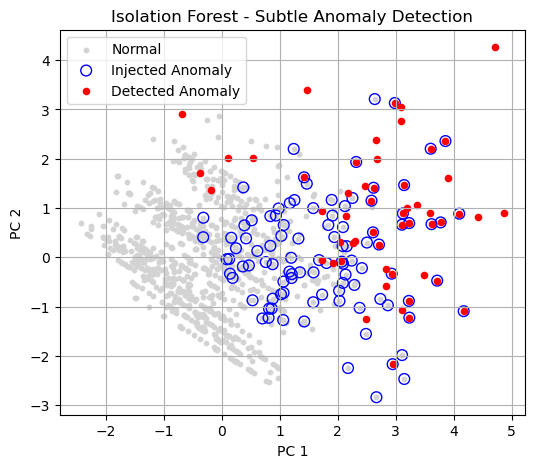

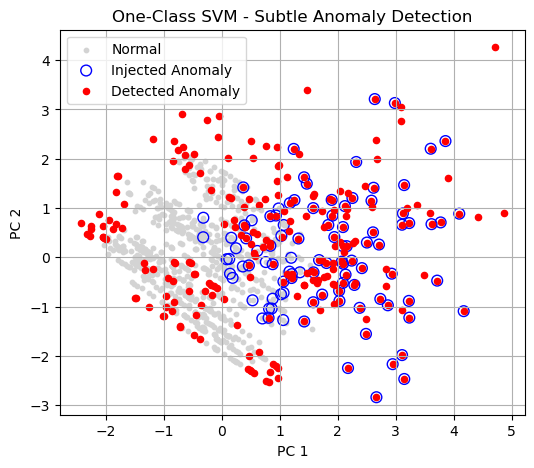

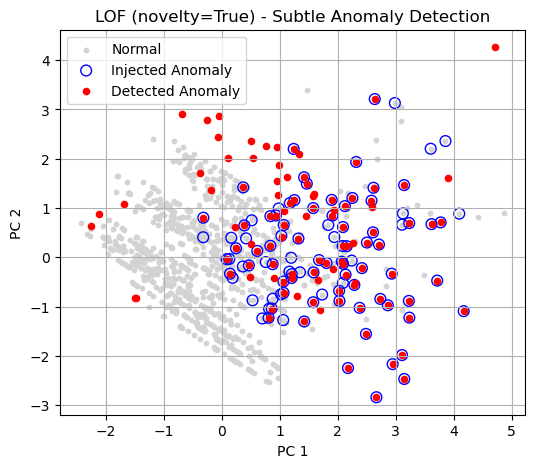

In [269]:
plot_model_preds(X_vis_2D, subtle_indices, pred_isoforest, "Isolation Forest")
plot_model_preds(X_vis_2D, subtle_indices, pred_ocsvm, "One-Class SVM")
plot_model_preds(X_vis_2D, subtle_indices, pred_lof, "LOF (novelty=True)")


In [278]:
y_true = np.zeros(len(X_scaled), dtype=int)
y_true[subtle_indices] = 1  

precision_isoforest = precision_score(y_true, pred_isoforest)
recall_isoforest = recall_score(y_true, pred_isoforest)
auc_isoforest = roc_auc_score(y_true, pred_isoforest)

precision_ocsvm = precision_score(y_true, pred_ocsvm)
recall_ocsvm = recall_score(y_true, pred_ocsvm)
auc_ocsvm = roc_auc_score(y_true, pred_ocsvm)

precision_lof = precision_score(y_true, pred_lof)
recall_lof = recall_score(y_true, pred_lof)
auc_lof = roc_auc_score(y_true, pred_lof)

print("Isolation Forest")
print(f"Precision: {precision_isoforest:.4f}, Recall: {recall_isoforest:.4f}, AUC: {auc_isoforest:.4f}\n")

print("One-Class SVM")
print(f"Precision: {precision_ocsvm:.4f}, Recall: {recall_ocsvm:.4f}, AUC: {auc_ocsvm:.4f}\n")

print("Local Outlier Factor (LOF)")
print(f"Precision: {precision_lof:.4f}, Recall: {recall_lof:.4f}, AUC: {auc_lof:.4f}")


Isolation Forest
Precision: 0.4074, Recall: 0.2200, AUC: 0.5922

One-Class SVM
Precision: 0.2955, Recall: 0.7300, AUC: 0.7683

Local Outlier Factor (LOF)
Precision: 0.6364, Recall: 0.7000, AUC: 0.8278


<h2>Import the model</h2>

In [896]:
joblib.dump(ocsvm, 'ocsvm_model.pkl')
joblib.dump(scaler, 'ocsvm_scaler.pkl')

['ocsvm_scaler.pkl']